# Log Likelihood Example

In [10]:
import numpy as np
import matplotlib.pyplot as plt

## Background

Gregor Mendel was an Austrian monk who studied the inheritance of traits in pea plants. He crossed plants with different traits and counted the number of offspring with each trait. He then developed a theory of inheritance based on the idea that each trait was controlled by a pair of factors (now called genes) and that each parent contributed one factor to each offspring. He also proposed that the factors controlling each trait were independent of each other. This theory is now called Mendelian inheritance.

Mendel's theory predicts that if you cross two plants that are heterozygous for a trait, then 3/4 of the offspring will have the dominant trait and 1/4 will have the recessive trait. For example, if you cross a plant with yellow seeds (YY) with a plant with green seeds (yy), then the offspring will have yellow seeds (Yy). If you cross two of these offspring, then 3/4 of the offspring will have yellow seeds and 1/4 will have green seeds.

Mendel performed many crosses and counted the number of offspring with each trait. He found that the number of offspring with each trait was close to the predicted number, but not exactly the same. For example, he found that 6022 of the offspring from the cross above had yellow seeds and 2001 had green seeds. He also found that the number of offspring with each trait was close to the predicted number for all of the traits that he studied.

Mendel's theory predicts that the number of offspring with each trait will be exactly the predicted number if you perform an infinite number of crosses. However, it is not possible to perform an infinite number of crosses. Instead, you can perform a large number of crosses and compare the number of offspring with each trait to the predicted number. If the number of offspring with each trait is close to the predicted number, then you can conclude that the factors controlling each trait are independent of each other. If the number of offspring with each trait is not close to the predicted number, then you can conclude that the factors controlling each trait are not independent of each other.

The number of offspring with each trait is called the observed number. The predicted number is called the expected number. The difference between the observed number and the expected number is called the residual. The sum of the squared residuals is called the chi-square statistic. The chi-square statistic is used to test the hypothesis that the factors controlling each trait are independent of each other.

The chi-square statistic is calculated as follows:

chi-square = sum of (observed - expected)^2 / expected

# Mathematical Derivation

Imagine an experiment with four possible outcomes. Let p1, p2, p3, and p4 be the probabilities of the four outcomes. Let n1, n2, n3, and n4 be the number of times each outcome occurs. The probability of observing n1, n2, n3, and n4 is given by:

$$P = (p_1^{n_1}) \cdot (p_2^{n_2}) \cdot (p_3^{n_3}) \cdot (p_4^{n_4})$$

The key question is:  what are the underlying probabilities?

Example:  Flipping a coin twice

Let p = probability of heads = 0.5
Let q = probability of tails = 0.5

The four possible outcomes are:

1.  HH: p1 = p*p = p^2
2. HT: p2 = p*q = pq
3. TH: p3 = q*p = qp
4. TT: p4 = q*q = q^2

The probability of observing n1, n2, n3, and n4 is given by:

$$P = p_1^{n_1} \cdot p_2^{n_2} \cdot p_3^{n_3} \cdot p_4^{n_4}$$
$$P = (p^2)^{n_1} \cdot (pq)^{n_2} \cdot (qp)^{n_3} \cdot (q^2)^{n_4}$$
$$P = p^{(2n_1 + n_2 + n_3)} \cdot q^{(n_2+n_3+2n_4)}$$
$$P = p^{(2n_1 + n_2 + n_3)} \cdot (1-p)^{(n_2+n_3+2n_4)}$$

Which values of n1, n2, n3, and n4 maximize P?

We can solve this as follows:

$$log(P) = (2n_1 + n_2 + n_3) log(p) + (n_2 + n_3 + 2n_4) log(1-p)$$
$$\frac{d(log(P)}{dp} = \frac{(2n_1 + n_2 + n_3)}{p} - \frac{(n_2 + n_3 + 2n_4)}{(1-p)} = 0$$
$$(2n_1 + n_2 + n_3)(1-p) = (n_2 + n_3 + 2n_4)(p)$$

$$p = \frac{(2n_1 + n_2 + n_3)}{((2n_1 + n_2 + n_3) + (n_2 + n_3 + 2n_4))$$
$$p = \frac{(2n_1 + n_2 + n_3)}{(2n)}$$


    







In [12]:
#Sample Data

n1 = 15
n2 = 26
n3 = 24
n4 = 18

ntotal = n1+n2+n3+n4

p = (2*n1+n2+n3)/(2*ntotal)
print("p = ",p," which is not quite the same as p = 0.5")

p =  0.4819277108433735  which is not quite the same as p = 0.5


## Chi-Square Test

The chi-square test is used to test the hypothesis that the factors controlling each trait are independent of each other. The chi-square statistic is calculated as follows:

chi-square = sum of (observed - expected)^2 / expected

In this case, we can calculate this as:

$$\chi^2 = \frac{(n_1 - n_1^t)^2}{n_1^t} + \frac{(n_2 - n_2^t)^2}{n_2^t} + \frac{(n_3 - n_3^t)^2}{n_3^t} + \frac{(n_4 - n_4^t)^2}{n_4^t}$$

where n1t, n2t, n3t, and n4t are the expected number of offspring with each trait.

In [13]:
n1t = ntotal*p**2
n2t = ntotal*p*(1-p)
n3t = ntotal*p*(1-p)
n4t = ntotal*(1-p)**2

chi2 = pow((n1-n1t),2)/n1t + pow((n2-n2t),2)/n2t + pow((n3-n3t),2)/n3t + pow((n4-n4t),2)/n4t

print("Chi^2 = ",chi2)

ndof = 4-1
print("ndof = ",ndof)

from scipy import stats

pvalue = 1.0 - stats.chi2.cdf(chi2,ndof)

print("pvalue = ",pvalue)

print("Since P < 0.95, we reject the null hypothesis that this process is governed by a simple p = 0.5 underlying model.")

Chi^2 =  3.6322319497025406
ndof =  3
pvalue =  0.3040126740138489
Since P > 0.05, we cannot reject the null hypothesis that this process is governed by a simple p = 0.5 underlying model.


# A better model

This data is actually from the results of the NHL Stanley Cup Final series over the last 83 years!  It represents the number of games played before a winner was declared.  The data is from <https://www.hockey-reference.com/playoffs/playoff-results.html>

The data is as follows:

n1 = 15:  4 games
n2 = 26:  5 games
n3 = 24:  6 games
n4 = 18:  7 games

Let p = probability that the "better" team wins a game
Let q = probability that the "worse" team wins a game

The four possible outcomes are:

1. Four Games

$$p_1 = p^4 + q^4$$
   
2. Five Games

$$p_2 = {4 \choose 3} (p^3 q p + q^3 p q)$$
$$ = 4 p q (p^3 + q^3)$$

3. Six Games

$$p_3 = {5 \choose 3} (p^3 q^2 p + q^3 p^2 q)$$
$$ = 10 p^2 q^2 (p^2 + q^2)$$

4. Seven Games

$$p_4 = {6 \choose 3} (p^3 q^3 p + q^3 p^3 q)$$
$$ = 20 p^3 q^3$$

The probability of observing n1, n2, n3, and n4 is given by:

$$P = p_1^{n_1} \cdot p_2^{n_2} \cdot p_3^{n_3} \cdot p_4^{n_4}$$
$$P = (p^4 + q^4)^{n_1} \cdot (4 p q (p^3 + q^3))^{n_2} \cdot (10 p^2 q^2 (p^2 + q^2))^{n_3} \cdot (20 p^3 q^3)^{n_4}$$

Which values of p and q maximize P?

This is super hard to solve, even with log-likehood methods.  So, we will use a numerical method to find the maximum likelihood values of p and q.

p =  0.6541  prob =  1.0
15 26 24 18
16.4 24.1 23.3 19.2
Chi^2 =  0.36299728724814306
ndof =  3
pvalue =  0.9477757015099199
Since P >= 0.95, we accept the null hypothesis that this process is governed by better team/worse team model.


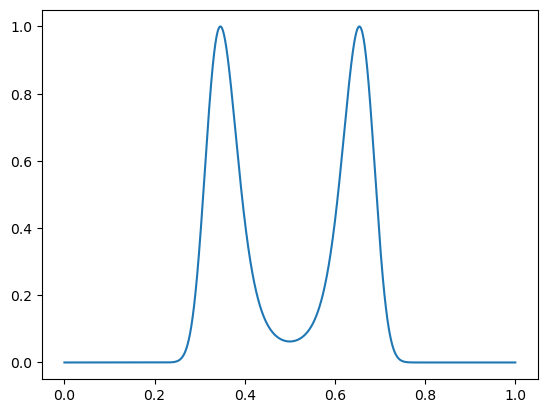

In [20]:
n1 = 15
n2 = 26
n3 = 24
n4 = 18

ntotal = n1+n2+n3+n4

niter=10000;
p = []
q = []
prob = []

pmax=0.0
imax = 0

for i in range(niter):
    p.append(1.0*i/niter)
    q.append(1.0 - p[i])
    
    p1 = pow(p[i],4)+pow(q[i],4)
    p2 = 4.0*p[i]*q[i]*(pow(p[i],3) + pow(q[i],3))
    p3 = 10.0*pow(p[i],2)*pow(q[i],2)*(pow(p[i],2) + pow(q[i],2))
    p4 = 20.0*pow(p[i],3)*pow(q[i],3)
    
    #p1 = p[i]**2
    #p2 = p[i]*q[i]
    #p3 = q[i]*p[i]
    #p4 = q[i]**2
    
    prob.append(pow(p1,n1)*pow(p2,n2)*pow(p3,n3)*pow(p4,n4))
    if (prob[i] >= pmax and p[i] > 0.5):
        pmax = prob[i]
        imax = i

prob = np.array(prob)
p = np.array(p)

prob = prob/pmax
print ("p = ",p[imax]," prob = ",prob[imax])

p1 = pow(p[imax],4)+pow(q[imax],4)
p2 = 4.0*p[imax]*q[imax]*(pow(p[imax],3) + pow(q[imax],3))
p3 = 10.0*pow(p[imax],2)*pow(q[imax],2)*(pow(p[imax],2) + pow(q[imax],2))
p4 = 20.0*pow(p[imax],3)*pow(q[imax],3)

#p1 = p[imax]**2
#p2 = p[imax]*q[imax]
#p3 = q[imax]*p[imax]
#p4 = q[imax]**2

n1t = ntotal*p1
n2t = ntotal*p2
n3t = ntotal*p3
n4t = ntotal*p4
chi2 = pow((n1-n1t),2)/n1t
chi2 += pow((n2-n2t),2)/n2t
chi2 += pow((n3-n3t),2)/n3t
chi2 += pow((n4-n4t),2)/n4t

print (n1,n2,n3,n4)
print (f"%.1f %.1f %.1f %.1f" % (n1t,n2t,n3t,n4t))
print ("Chi^2 = ",chi2)

ndof = 4-1
print ("ndof = ",ndof)

from scipy import stats

pvalue = 1.0 - stats.chi2.cdf(chi2,ndof)

print("pvalue = ",pvalue)

print("Since P >= 0.95, we accept the null hypothesis that this process is governed by better team/worse team model.")

plt.plot(p,prob)
plt.show()